The Heston diffusion process is defined as follows 

$dX(t)/X(t) = \sqrt{v(t)}dW(t)$

$dv(t) = \kappa(\theta - v(t))dt + \sigma \sqrt{v(t)}dZ(t)$

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, ncx2, multivariate_normal, kde
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import seaborn as sns


In [113]:
# Parameters for the Heston model
s0 = 100               # Initial asset price
v0 = 0.04              # Initial variance (volatility^2)
# mu = 0.1               # Drift of the asset price
κ = 0.2                # Rate of mean reversion
theta = 0.05           # Long-term variance
σ = 0.1                # Volatility of volatility
ρ = -0.7               # Correlation between the two Brownian motions
t = 1.0                # Time horizon
dt = 1/252             # Time step (daily)
steps = int(t / dt)    # Number of time steps
paths = 10000             # Number of paths

# Generate random Brownian Motion
mu = np.array([0, 0])
cov = np.matrix([[1, ρ], [ρ, 1]])
w = multivariate_normal.rvs(mean=mu, cov=cov, size=(paths, steps))
w_s = w[:, :, 0]    # Stock Brownian motion:     W_1
w_v = w[:, :, 1]    # Variance Brownian motion:  W_2

#def generate_correlated_randoms(N, ρ):
#    " Generate correlated random variables (Cholesky)"
#    z1 = np.random.normal(size=N)
#    z2 = ρ * z1 + np.sqrt(1 - ρ**2) * np.random.normal(size=N)
#    return z1, z2

# Initialize arrays to store the paths
s = np.zeros((paths, steps))
v = np.zeros((paths, steps))
s[:, 0] = s0
v[:, 0] = v0

In [114]:
# Simulate paths
def floor(a):
    return np.where(a > 0, a, 0)


for i in range(1, steps):
    # z_s, z_v = generate_correlated_randoms(1, ρ)

    # Update volatility
    v[:, i] = v[:, i-1] + κ * (theta - floor(v[:,i-1])) * dt + σ * np.sqrt(floor(v[:,i-1])) * w_v[:, i] * np.sqrt(dt)

    # Update asset price
    s[:, i] = s[:, i-1] * np.exp(-0.5 * floor(v[:, i-1]) * dt + np.sqrt(floor(v[:,i-1])) * w_s[:, i] * np.sqrt(dt))


In [62]:
def var_v(v0, σ, κ, θ, t):
    term1 = v0 * σ**2 * (np.exp(-κ * t) - np.exp(-2 * κ * t))
    term2 = θ * σ**2 * (1 - np.exp(-κ * t))**2 * (1 / κ) * (2 * κ / 2)
    return term1 + term2

def mean_v(v0, κ, θ, t):
    return θ + (v0 - θ) * np.exp(-κ*t)


In [67]:
mean_v(v0, κ, theta, np.arange(0, 1, dt))

array([0.05      , 0.04994065, 0.04988166, 0.04982301, 0.04976472,
       0.04970677, 0.04964916, 0.04959189, 0.04953497, 0.04947838,
       0.04942213, 0.04936621, 0.04931063, 0.04925537, 0.04920044,
       0.04914584, 0.04909156, 0.04903761, 0.04898397, 0.04893066,
       0.04887766, 0.04882497, 0.0487726 , 0.04872053, 0.04866878,
       0.04861733, 0.04856619, 0.04851535, 0.04846482, 0.04841458,
       0.04836464, 0.048315  , 0.04826565, 0.0482166 , 0.04816784,
       0.04811936, 0.04807118, 0.04802328, 0.04797566, 0.04792833,
       0.04788128, 0.0478345 , 0.04778801, 0.04774179, 0.04769584,
       0.04765017, 0.04760477, 0.04755964, 0.04751477, 0.04747018,
       0.04742584, 0.04738177, 0.04733796, 0.04729441, 0.04725112,
       0.04720809, 0.04716531, 0.04712279, 0.04708052, 0.0470385 ,
       0.04699673, 0.0469552 , 0.04691392, 0.04687289, 0.0468321 ,
       0.04679156, 0.04675125, 0.04671119, 0.04667136, 0.04663176,
       0.04659241, 0.04655328, 0.04651439, 0.04647573, 0.04643

In [52]:
np.arange(0, 252, 1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

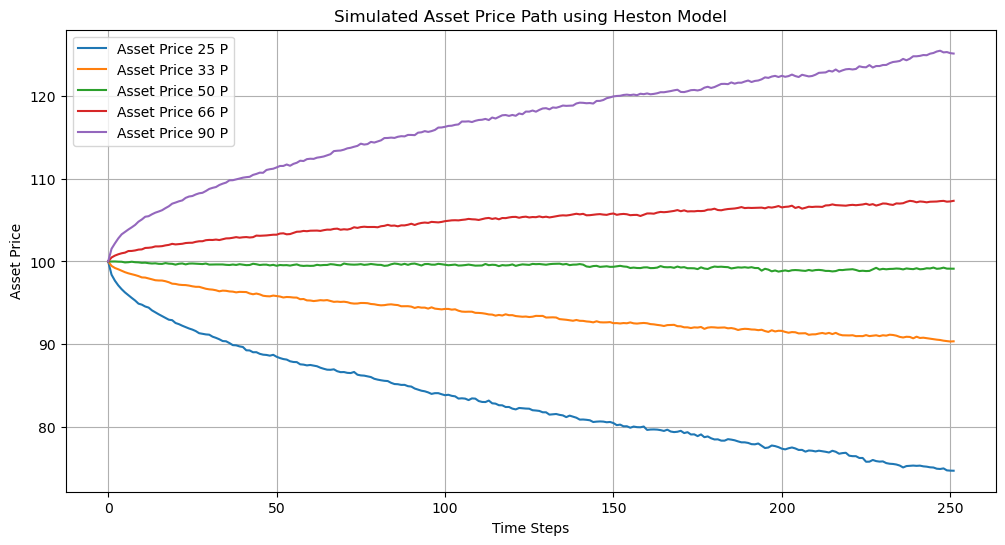

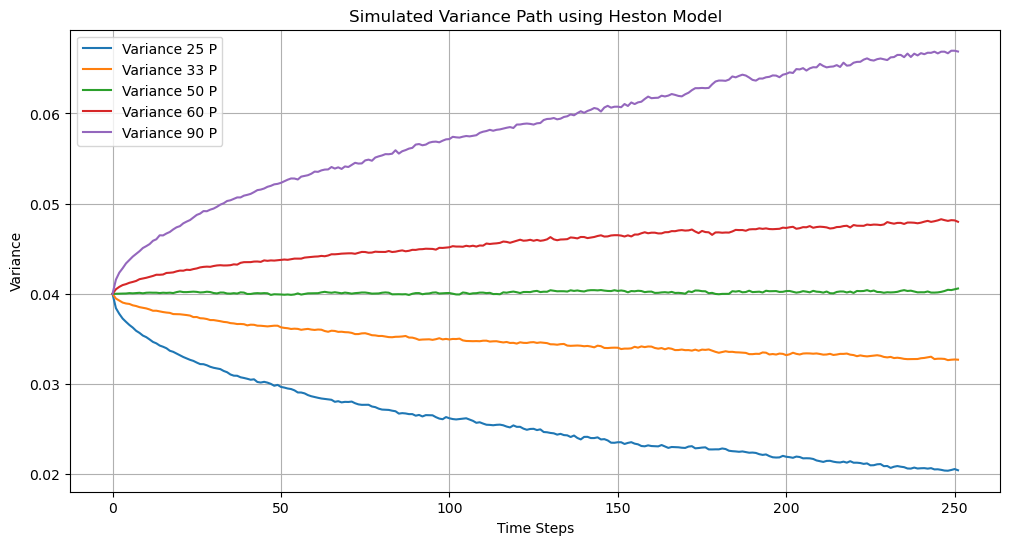

In [99]:


# Plot the simulated paths
plt.figure(figsize=(12, 6))
plt.plot(np.quantile(s, 0.10, axis=0), label='Asset Price 25 P')
plt.plot(np.quantile(s, 0.33, axis=0), label='Asset Price 33 P')
plt.plot(np.quantile(s, 0.5, axis=0), label='Asset Price 50 P')
plt.plot(np.quantile(s, 0.66, axis=0), label='Asset Price 66 P')
plt.plot(np.quantile(s, 0.90, axis=0), label='Asset Price 90 P')
plt.title('Simulated Asset Price Path using Heston Model')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.quantile(v, 0.1, axis=0), label='Variance 25 P')
plt.plot(np.quantile(v, 0.33, axis=0), label='Variance 33 P')
plt.plot(np.quantile(v, 0.5, axis=0), label='Variance 50 P')
#plt.plot(mean_v(v0, κ, theta, np.arange(0, 1, dt)), label='Theo Mean')
plt.plot(np.quantile(v, 0.66, axis=0), label='Variance 60 P')
plt.plot(np.quantile(v, 0.90, axis=0), label='Variance 90 P')
plt.title('Simulated Variance Path using Heston Model')
plt.xlabel('Time Steps')
plt.ylabel('Variance')
plt.legend()
plt.grid()

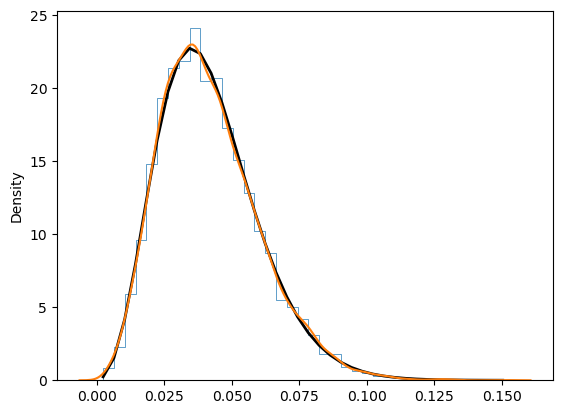

In [115]:
fig, ax = plt.subplots()

d = 4*κ*theta/σ**2

def n(κ, σ, t):
    return (4*κ*np.exp(-κ*t))/(σ**2*(1 - np.exp(-κ*t)))

rv = ncx2(d, n(κ, σ, 1)*v0)
a = (σ**2*(1 - np.exp(-κ*t)))/(4*κ)

data = v[:, 251]
dx = 0.004
# x = np.linspace(np.min(data), np.max(data), 50)
x = np.arange(np.min(data), np.max(data), dx)
ax.hist(data, linewidth=0.5, histtype='step', density=True, bins=x)
ax.plot(x, rv.pdf(x/a)/a, 'k-', lw=2, label='frozen pdf')
sns.kdeplot(data=data, ax=ax)
#ax.plot(x, ((σ**2*(1 - np.exp(-κ*t)))/(4*κ))*rv.pdf(x), 'k-', lw=2, label='frozen pdf')
# ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# ax.set(xlim=(0, 0.1), xticks=np.arange(1, 8),
#       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

In [109]:
tips = sns.load_dataset("tips")

<Axes: ylabel='Density'>

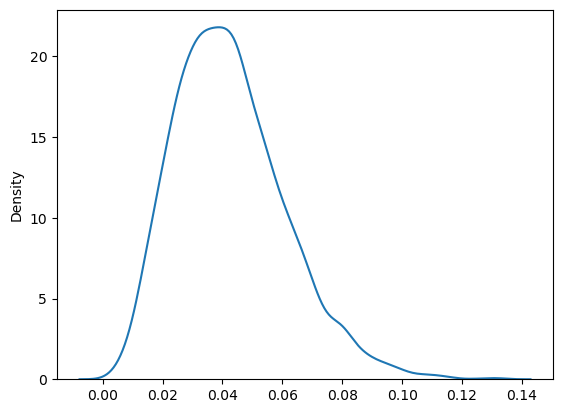

In [111]:
sns.kdeplot(data=data)

In [106]:
# kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)
# log_density = kde.score_samples(data)

ValueError: Expected 2D array, got 1D array instead:
array=[0.04407401 0.00981889 0.04897343 ... 0.04624834 0.03342168 0.04096886].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [105]:
X

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175],
       [-1.07296862],
       [ 0.86540763],
       [-2.3015387 ],
       [ 6.74481176],
       [ 4.2387931 ],
       [ 5.3190391 ],
       [ 4.75062962],
       [ 6.46210794],
       [ 2.93985929],
       [ 4.6775828 ],
       [ 4.61594565],
       [ 6.13376944],
       [ 3.90010873],
       [ 4.82757179],
       [ 4.12214158],
       [ 5.04221375],
       [ 5.58281521]])

In [87]:
a = (σ**2*(1 - np.exp(-κ*t)))/(4*κ)

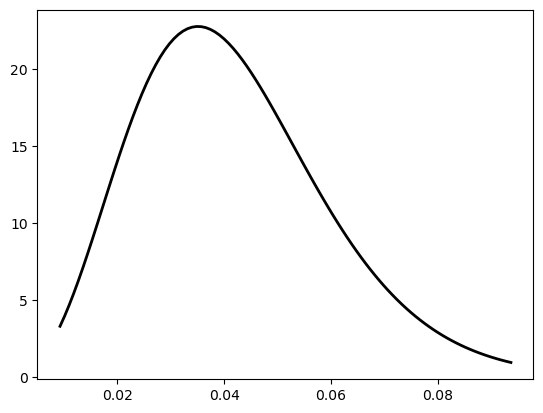

In [94]:
df, nc = 4, 14.453297811606378
x = np.linspace(a*ncx2.ppf(0.01, df, nc),
                a*ncx2.ppf(0.99, df, nc), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, ncx2.pdf(x/a, df, nc)/a,
       'k-', lw=2, label='ncx2 pdf')
plt.show()

In [95]:
integrate.quad(lambda x: ncx2.pdf(x/a, df, nc)/a, np.min(x), np.max(x))

(0.98, 3.956433890415364e-11)

In [ ]:
def var_v(v0, σ, κ, θ, t):
    term1 = v0 * σ**2 * (np.exp(-κ*t) - np.exp(-2 * κ * T))
    term2 = θ * σ**2 * (1 - np.exp(-κ * t))**2 * (1 / κ) * (2 * κ / 2)
    return term1 + term2

def mean_v(v0, κ, θ, t):
    return v0 * t + v0 + κ * (θ - v0) * t

In [ ]:
# Plot the simulated paths
# plt.figure(figsize=(12, 6))
# plt.plot(s, label='Asset Price')
# plt.title('Simulated Asset Price Path using Heston Model')
# plt.xlabel('Time Steps')
# plt.ylabel('Asset Price')
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(v, label='Variance')
# plt.title('Simulated Variance Path using Heston Model')
# plt.xlabel('Time Steps')
# plt.ylabel('Variance')
# plt.legend()
# plt.grid()
plt.show()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(T_vec, np.exp(X))
ax1.set_title("Heston model, Stock process. 3 paths")
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock")
ax2.plot(T_vec, np.exp(Y))
ax2.set_title("Heston model, Variance process. 3 paths")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")
ax2.plot(T_vec, (theta + std_asy) * np.ones_like(T_vec), label="1 asymptotic std dev", color="black")
ax2.plot(T_vec, (theta - std_asy) * np.ones_like(T_vec), color="black")
ax2.plot(T_vec, theta * np.ones_like(T_vec), label="Long term mean")
ax2.legend(loc="upper right")
plt.show()


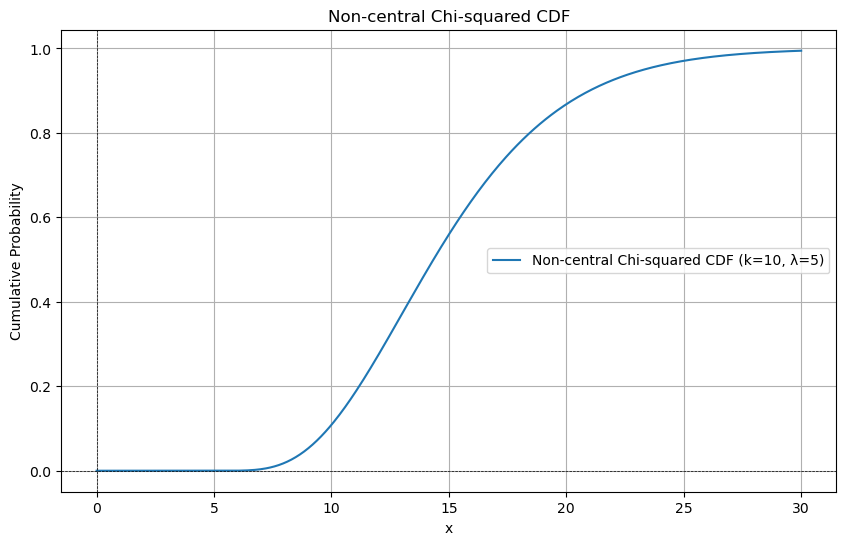

In [2]:
# Parameters for the non-central chi-squared distribution
k = 2    # degrees of freedom
λ = 1     # non-centrality parameter

#d = 4**epsilon*2

#$n(t,T) = \frac{4 \kappa e^{-\kappa (T-t)}}{\epsilon^2 (1 - e^{-\kappa (T-t)})}

# Define the range of x values
x = np.linspace(0, 30, 500)

# Calculate the CDF
cdf = chi2.cdf(x, df=df, loc=nc)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, cdf, label=f'Non-central Chi-squared CDF (df={df}, nc={nc})')
plt.title('Non-central Chi-squared CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

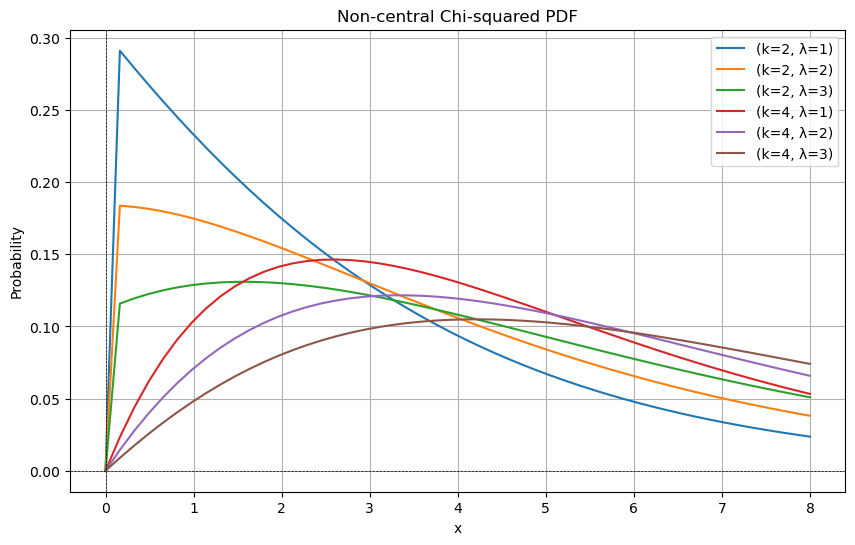

In [14]:
# Parameters for the non-central chi-squared distribution
# Define the range of x values
# x = np.linspace(ncx2.ppf(0.01, df, nc),
#                ncx2.ppf(0.99, df, nc), 100)
# k = 2    # degrees of freedom
# λ = 1     # non-centrality parameter
params = [(2,1), (2,2), (2,3), (4,1), (4,2), (4,3)]

x = np.linspace(0, 8, 50)

# Calculate the CDF
pdf = ncx2.pdf(x, k, λ)

# Plot the CDF
plt.figure(figsize=(10, 6))
for p in params:
    plt.plot(x, ncx2.pdf(x, p[0], p[1]), label=f'(k={p[0]}, λ={p[1]})')
plt.title('Non-central Chi-squared PDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

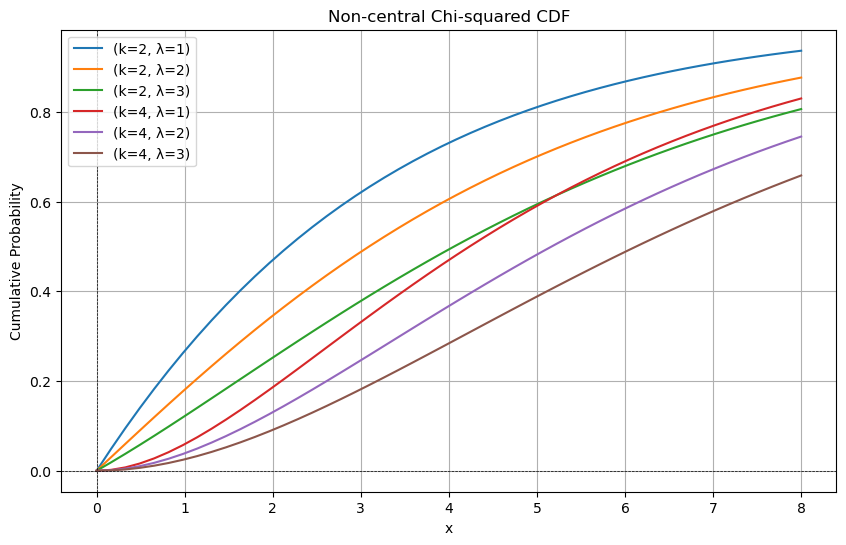

In [15]:
params = [(2,1), (2,2), (2,3), (4,1), (4,2), (4,3)]

x = np.linspace(0, 8, 50)

# Calculate the CDF
pdf = ncx2.pdf(x, k, λ)

# Plot the CDF
plt.figure(figsize=(10, 6))
for p in params:
    plt.plot(x, ncx2.cdf(x, p[0], p[1]), label=f'(k={p[0]}, λ={p[1]})')
plt.title('Non-central Chi-squared CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

$d = \frac{4 \kappa \theta}{\sigma^2}$

$n(t,T) = \frac{4 \kappa e^{-\kappa (T-t)}}{\sigma^2 (1 - e^{-\kappa (T-t)})}$


In [ ]:
d = 4*κ*theta/sigma**2

def n(κ, σ, t):
    return (4*κ*np.exp(-κ*t))/(σ**2*(1 - np.exp(-κ*t)))

In [ ]:
t = 0.1
v0 = 0.04
theta = 0.04
kappa = 0.5
sigma = 1.

from ql/processes/hestonprocess.cpp

Discretization {  PartialTruncation,
                  FullTruncation,
                  Reflection,
                  NonCentralChiSquareVariance,
                  QuadraticExponential,
                  QuadraticExponentialMartingale,
                  BroadieKayaExactSchemeLobatto,
                  BroadieKayaExactSchemeLaguerre,
                  BroadieKayaExactSchemeTrapezoidal };

In [18]:
np.random.seed(seed=42)

steps = 10  # time steps
paths = 3  # number of paths
T = 1
T_vec, dt = np.linspace(0, T, N, retstep=True)
dt_sq = np.sqrt(dt)

S0 = 100  # spot price
X0 = np.log(S0)  # log price
v0 = 0.04  # spot variance
Y0 = np.log(v0)  # log-variance

mu = 0.1  # drift
rho = -0.2  # correlation coefficient
kappa = 2  # mean reversion coefficient
theta = 0.04  # long-term variance
sigma = 0.3  # Vol of Vol - Volatility of instantaneous variance
std_asy = np.sqrt(theta * sigma**2 / (2 * kappa))  # asymptotic standard deviation for the CIR process
assert 2 * kappa * theta > sigma**2  # Feller condition

# Generate random Brownian Motion
MU = np.array([0, 0])
COV = np.matrix([[1, rho], [rho, 1]])
W = multivariate_normal.rvs(mean=MU, cov=COV, size=(N - 1, paths))
W_S = W[:, :, 0]  # Stock Brownian motion:     W_1
W_v = W[:, :, 1]  # Variance Brownian motion:  W_2

# Initialize vectors
Y = np.zeros((N, paths))
Y[0, :] = Y0
X = np.zeros((N, paths))
X[0, :] = X0
v = np.zeros(N)

# Generate paths
for t in range(0, N - 1):
    v = np.exp(Y[t, :])  # variance
    v_sq = np.sqrt(v)  # square root of variance

    Y[t + 1, :] = (
        Y[t, :] + (1 / v) * (kappa * (theta - v) - 0.5 * sigma**2) * dt + sigma * (1 / v_sq) * dt_sq * W_v[t, :]
    )
    X[t + 1, :] = X[t, :] + (mu - 0.5 * v) * dt + v_sq * dt_sq * W_S[t, :]

NameError: name 'ss' is not defined

In [ ]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(T_vec, np.exp(X))
ax1.set_title("Heston model, Stock process. 3 paths")
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock")
ax2.plot(T_vec, np.exp(Y))
ax2.set_title("Heston model, Variance process. 3 paths")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")
ax2.plot(T_vec, (theta + std_asy) * np.ones_like(T_vec), label="1 asymptotic std dev", color="black")
ax2.plot(T_vec, (theta - std_asy) * np.ones_like(T_vec), color="black")
ax2.plot(T_vec, theta * np.ones_like(T_vec), label="Long term mean")
ax2.legend(loc="upper right")
plt.show()